In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
#This class helps in cropping the specified coordinated in the function
class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y)-coordinates of
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0
    def getMemoryShapes(self, inputs):
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])
        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H
        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]
    def forward(self, inputs):
        return [inputs[0][:, :, self.startY:self.endY,self.startX:self.endX]]

In [6]:
# image = cv2.imread('retina2/172.bmp')
image = cv2.imread('sample_172_201_Nwindow30.bmp')
#The caffemodel contains the model of the architecture and the deploy.prototxt contains the weights
protoPath = 'deploy.prototxt.txt'
modelPath = 'hed_pretrained_bsds.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
# register our new layer with the model
cv2.dnn_registerLayer("Crop", CropLayer)
(H, W) = image.shape[:2]

In [7]:
#Input image is converted to a blog
blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(W, H),mean=(104.00698793, 116.66876762, 122.67891434),swapRB=False, crop=False)
#We pass the blob into the network and make a forward pass
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")

(-0.5, 349.5, 348.5, -0.5)

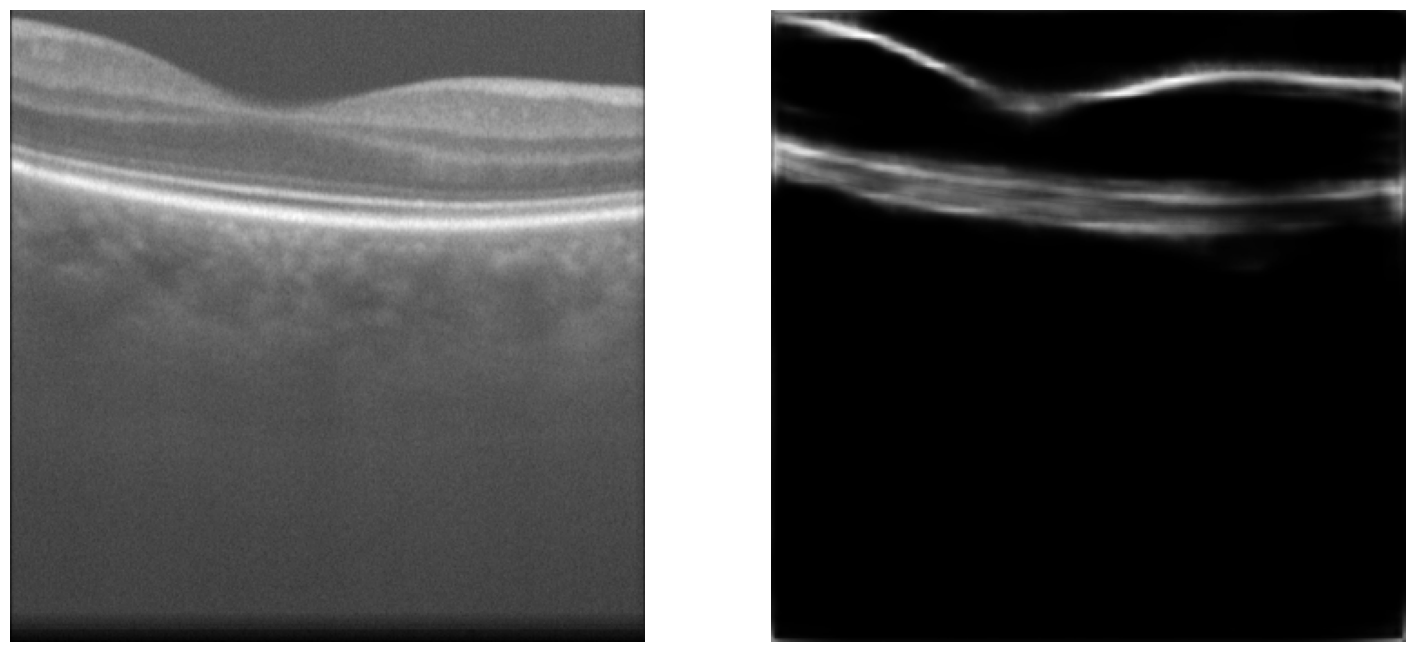

In [8]:

test_y = image
#The test image has its third dimesion as 3
#So we are extractin only one dimension
test_y = test_y[:,:,0]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Perform the canny operator
canny = cv2.Canny(blurred, 30, 150)

#Normalising all the images
test_y = test_y/255
hed = hed/255
canny = canny/255
gray = gray/255

fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(hed,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

In [9]:
from skimage.metrics import mean_squared_error,peak_signal_noise_ratio,structural_similarity
#Calculating metrics between actual test image and the output we got through Canny edge detection
print(mean_squared_error(test_y,canny),peak_signal_noise_ratio(test_y,canny),structural_similarity(test_y,canny))
#Calculating metrics between actual test image and the output we got through HED
print(mean_squared_error(test_y,hed),peak_signal_noise_ratio(test_y,hed),structural_similarity(test_y,hed))

ValueError: Since image dtype is floating point, you must specify the data_range parameter. Please read the documentation carefully (including the note). It is recommended that you always specify the data_range anyway.